<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


## Що таке візуалізація?

**Візуалізація даних** — це перетворення чисел у графіки. Це допомагає:

* Побачити тренди, зв’язки, аномалії;
* Краще пояснити дані замовнику чи колезі;
* Пояснити аналітику не-технічній аудиторії.
* Виявити помилки у даних;
* Підготувати звіти чи презентації.

> **Поганий графік гірше відсутності графіка.**

## На що звертати увагу

1. **Шкала (scale)**: чи є змінна кількісною, порядковою чи категоріальною.
2. **Вибір типу графіка**: scatter, bar, box, histogram — мають різні цілі.
3. **Агрегація**: barplot по середньому ≠ медіані.
4. **Пропуски та викиди**: не всі графіки "прощають" `NaN`.
5. **Маніпуляція масштабом**: неправильна шкала осі Y може спотворити висновки.
6. **Колір, форма, розмір**: візуальна увага зосереджується на яскравому — це впливає на інтерпретацію.

## Базові принципи якісної візуалізації:

| Принцип               | Пояснення                                                  |
| --------------------- | ---------------------------------------------------------- |
| 1. 📐 Адекватна шкала | Не змінюйте шкали так, щоб спотворити дані.                |
| 2. 🎯 Простота        | Один графік — одна ідея. Уникайте перенавантаження.        |
| 3. 🧩 Пояснення       | Підписи осей, легенди, заголовки — обов’язкові.            |
| 4. 🎨 Колір з сенсом  | Використовуйте колір, тільки якщо він щось означає.        |
| 5. ⚠️ Контекст        | Без осі, без одиниць виміру — це не графік, а маніпуляція. |

## Як графіки можуть обманювати?

**Приклад 1: Обрізана вісь Y**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

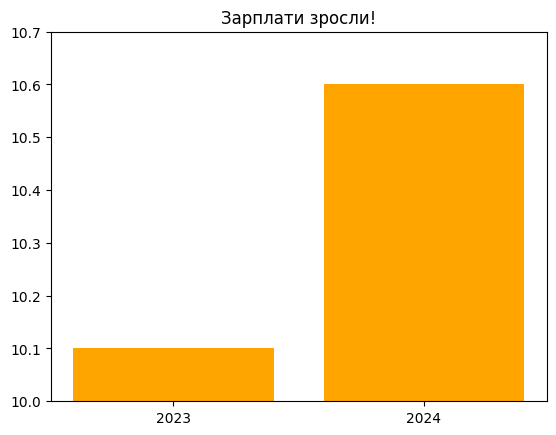

In [ ]:
plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(10, 10.7)
plt.title("Зарплати зросли!")
plt.show()

> Виглядає, наче зарплата підскочила вдвічі, хоча зростання — лише 5%.

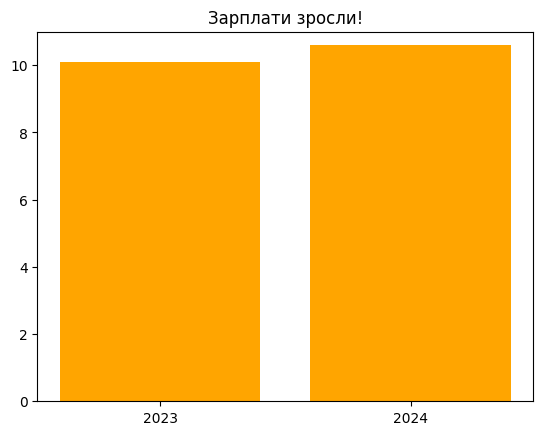

In [ ]:
plt.bar(['2023', '2024'], [10.1, 10.6], color='orange')
plt.ylim(0, 11)
plt.title("Зарплати зросли!")
plt.show()

**Приклад 2: Зміна масштабу X/Y**

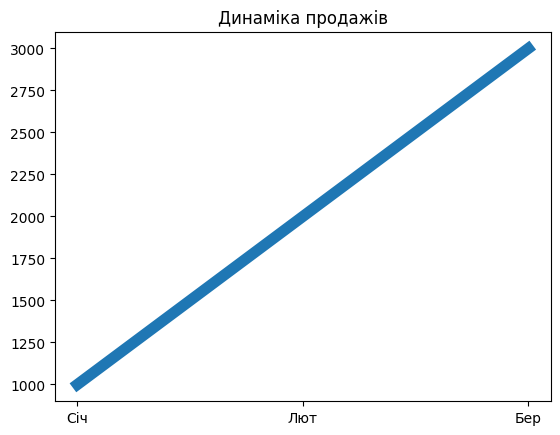

In [ ]:
plt.plot([1, 2, 3], [1000, 2000, 3000], label="Продажі", linewidth=8)
plt.xticks([1, 2, 3], ['Січ', 'Лют', 'Бер'])
plt.title("Динаміка продажів")
plt.show()


> Лінія крута, бо лінії візуально підкреслюють зміну, навіть якщо вона лінійна.

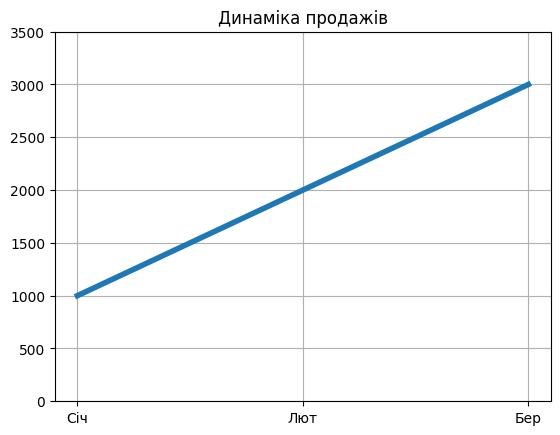

In [ ]:
plt.plot([1, 2, 3], [1000, 2000, 3000], label="Продажі", linewidth=4)
plt.xticks([1, 2, 3], ['Січ', 'Лют', 'Бер'])
plt.ylim(0, 3500)
plt.title("Динаміка продажів")
plt.grid(True)
plt.show()


## Приклади неякісної візуалізації

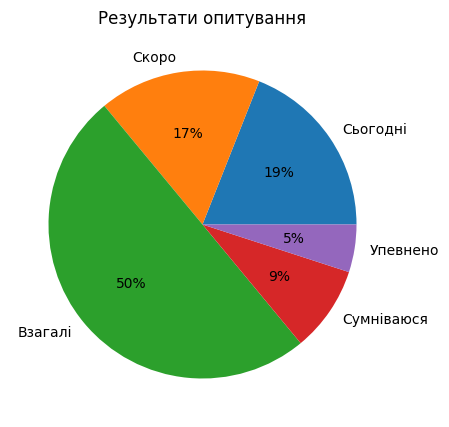

In [ ]:
# ---------------------------------------------------------
# 1. Кругова діаграма — "Результати опитування"
# ---------------------------------------------------------
labels = ["Сьогодні", "Скоро", "Взагалі", "Сумніваюся", "Упевнено"]
sizes = [19, 17, 50, 9, 5]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.0f%%')
ax1.set_title("Результати опитування")
plt.show()

### 🔴 Чому графік неефективний

* Кругові діаграми погано передають різницю між секторами.
* Людське око погано оцінює кути → важко порівнювати значення.
* Багато категорій = текст дрібний.
* Немає чіткого порядку → інтерпретація сповільнюється.

### 🟢 Кращий варіант

**Горизонтальна стовпчикова діаграма**

* Легко порівнювати.
* Можна сортувати.
* Текст читабельний.

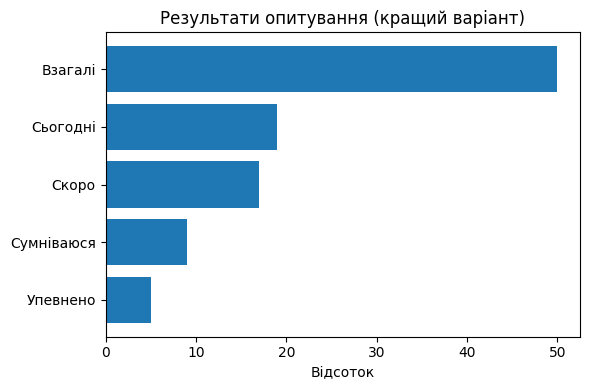

In [ ]:

import matplotlib.pyplot as plt

labels = ["Сьогодні", "Скоро", "Взагалі", "Сумніваюся", "Упевнено"]
sizes = [19, 17, 50, 9, 5]

# Сортування для кращої читаємості
sizes_sorted, labels_sorted = zip(*sorted(zip(sizes, labels)))

plt.figure(figsize=(6,4))
plt.barh(labels_sorted, sizes_sorted)
plt.title("Результати опитування (кращий варіант)")
plt.xlabel("Відсоток")
plt.tight_layout()
plt.show()

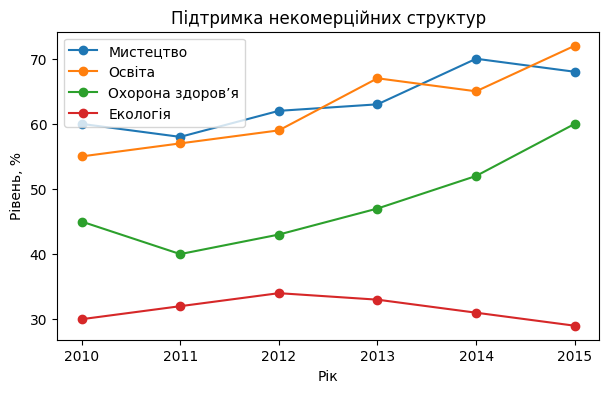

In [ ]:
# ---------------------------------------------------------
# 2. Лінійний графік — "Підтримка некомерційних структур"
# ---------------------------------------------------------
years = [2010, 2011, 2012, 2013, 2014, 2015]

arts =      [60, 58, 62, 63, 70, 68]
education = [55, 57, 59, 67, 65, 72]
health =    [45, 40, 43, 47, 52, 60]
environment=[30, 32, 34, 33, 31, 29]

fig2, ax2 = plt.subplots(figsize=(7,4))
ax2.plot(years, arts,        marker="o", label="Мистецтво")
ax2.plot(years, education,   marker="o", label="Освіта")
ax2.plot(years, health,      marker="o", label="Охорона здоров’я")
ax2.plot(years, environment, marker="o", label="Екологія")

ax2.set_title("Підтримка некомерційних структур")
ax2.set_xlabel("Рік")
ax2.set_ylabel("Рівень, %")
ax2.legend()
plt.show()

### 🔴 Чому графік неефективний

* Забагато ліній → втрачається читабельність.
* Легенда громіздка.
* Перетини ліній роблять графік шумним.
* Значення не показані напряму.

### 🟢 Кращий варіант

**Фасет-графік (по одному графіку на категорію)**

* Кожна категорія читається окремо.
* Легко порівнювати тренди.

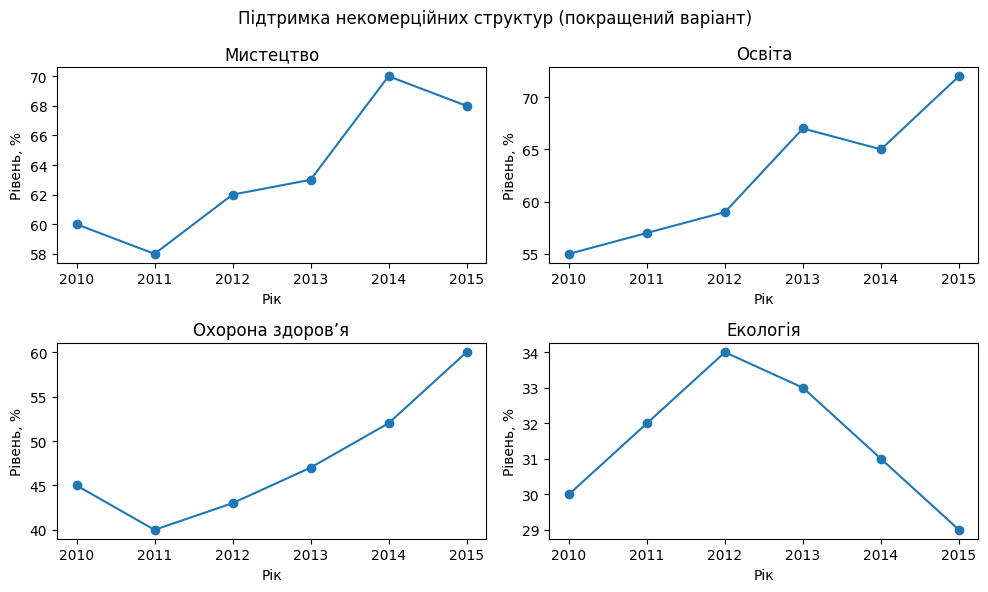

In [ ]:

import matplotlib.pyplot as plt

years = [2010, 2011, 2012, 2013, 2014, 2015]
data = {
    "Мистецтво": [60, 58, 62, 63, 70, 68],
    "Освіта": [55, 57, 59, 67, 65, 72],
    "Охорона здоров’я": [45, 40, 43, 47, 52, 60],
    "Екологія": [30, 32, 34, 33, 31, 29]
}

fig, axes = plt.subplots(2, 2, figsize=(10,6))

for ax, (name, values) in zip(axes.flat, data.items()):
    ax.plot(years, values, marker="o")
    ax.set_title(name)
    ax.set_xlabel("Рік")
    ax.set_ylabel("Рівень, %")

fig.suptitle("Підтримка некомерційних структур (покращений варіант)")
plt.tight_layout()
plt.show()

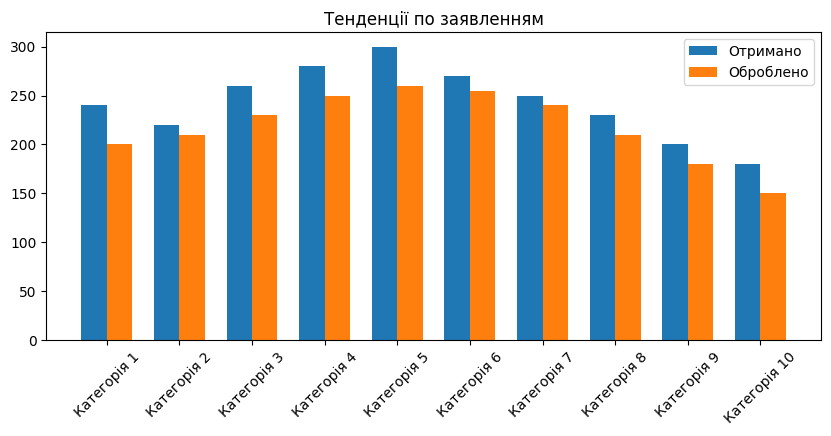

In [ ]:
# ---------------------------------------------------------
# 3. Стовпчикова діаграма — "Тенденції по заявленням"
# ---------------------------------------------------------
categories = [f"Категорія {i}" for i in range(1, 11)]
received =   [240, 220, 260, 280, 300, 270, 250, 230, 200, 180]
processed =  [200, 210, 230, 250, 260, 255, 240, 210, 180, 150]

x = np.arange(len(categories))
w = 0.35

fig3, ax3 = plt.subplots(figsize=(10,4))
ax3.bar(x - w/2, received,  width=w, label="Отримано")
ax3.bar(x + w/2, processed, width=w, label="Оброблено")

ax3.set_title("Тенденції по заявкам")
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=45)
ax3.legend()
plt.show()

### 🔴 Чому графік неефективний

* Забагато категорій -> 10 x 2 бари = візуальний шум.
* Важко порівняти різницю між “отримано” і “оброблено”.
* Підписи дрібні та повернуті.

### 🟢 Кращий варіант

**Графік різниці ("отримано − оброблено")**

* Відразу видно відставання обробки.
* Менше шуму, легше інтерпретувати.

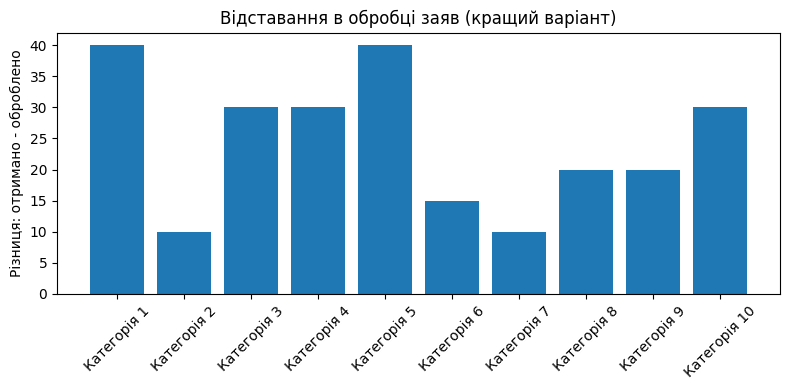

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

categories = [f"Категорія {i}" for i in range(1, 11)]
received = np.array([240, 220, 260, 280, 300, 270, 250, 230, 200, 180])
processed = np.array([200, 210, 230, 250, 260, 255, 240, 210, 180, 150])

difference = received - processed

plt.figure(figsize=(8,4))
plt.bar(categories, difference)
plt.title("Відставання в обробці заяв (кращий варіант)")
plt.ylabel("Різниця: отримано - оброблено")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

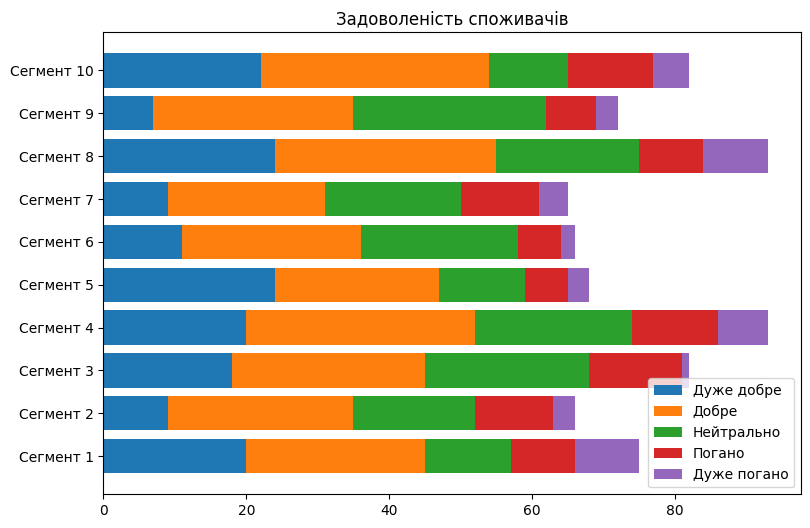

In [ ]:
# ---------------------------------------------------------
# 4. Горизонтальні stacked bars — "Задоволеність споживачів"
# ---------------------------------------------------------
segments = [f"Сегмент {i}" for i in range(1, 11)]

very =     np.random.randint(5, 25, 10)
good =     np.random.randint(20, 40, 10)
neutral =  np.random.randint(10, 30, 10)
bad =      np.random.randint(5, 15, 10)
awful =    np.random.randint(1, 10, 10)

fig4, ax4 = plt.subplots(figsize=(9,6))
ax4.barh(segments, very,     label="Дуже добре")
ax4.barh(segments, good,     left=very,     label="Добре")
ax4.barh(segments, neutral,  left=very+good,     label="Нейтрально")
ax4.barh(segments, bad,      left=very+good+neutral,     label="Погано")
ax4.barh(segments, awful,    left=very+good+neutral+bad, label="Дуже погано")

ax4.set_title("Задоволеність споживачів")
ax4.legend(loc="lower right")
plt.show()

### 🔴 Чому графік неефективний

* 10 сегментів × 5 категорій = 50 кольорових блоків.
* Дуже важко прочитати.
* Неможливо відстежити патерни.
* Stacked bars погано порівнюються (крім першої категорії).

### 🟢 Кращий варіант

**Нормалізований stacked bar (100%)**

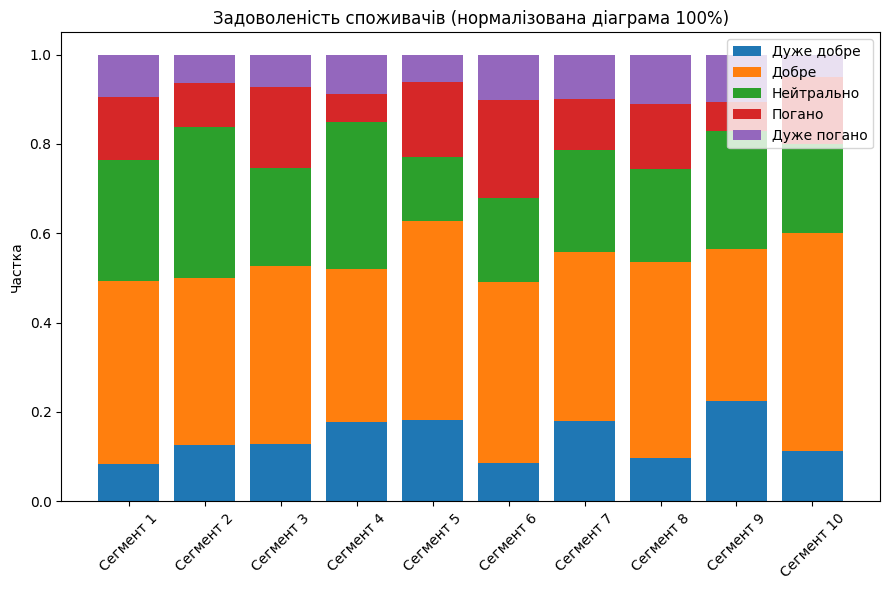

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

segments = [f"Сегмент {i}" for i in range(1, 11)]

very =     np.random.randint(5, 25, 10)
good =     np.random.randint(20, 40, 10)
neutral =  np.random.randint(10, 30, 10)
bad =      np.random.randint(5, 15, 10)
awful =    np.random.randint(1, 10, 10)

data = np.vstack([very, good, neutral, bad, awful])

# Нормалізація до 100%
data_pct = data / data.sum(axis=0)

labels = ["Дуже добре", "Добре", "Нейтрально", "Погано", "Дуже погано"]

plt.figure(figsize=(9,6))

bottom = np.zeros(len(segments))

for row, label in zip(data_pct, labels):
    plt.bar(segments, row, bottom=bottom, label=label)
    bottom += row

plt.title("Задоволеність споживачів (нормалізована діаграма 100%)")
plt.ylabel("Частка")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


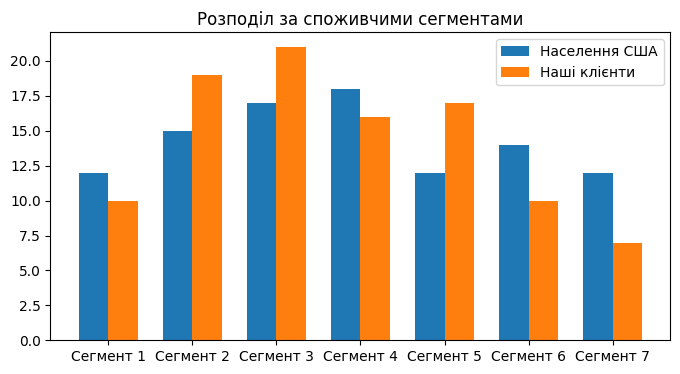

In [ ]:
# ---------------------------------------------------------
# 5. Дві стовпчикові серії — "Розподіл за споживчими сегментами"
# ---------------------------------------------------------
segments = [f"Сегмент {i}" for i in range(1, 8)]
us_pop =    [12, 15, 17, 18, 12, 14, 12]
our_clients=[10, 19, 21, 16, 17, 10, 7]

x = np.arange(len(segments))
w = 0.35

fig5, ax5 = plt.subplots(figsize=(8,4))
ax5.bar(x - w/2, us_pop, width=w, label="Населення США")
ax5.bar(x + w/2, our_clients, width=w, label="Наші клієнти")

ax5.set_title("Розподіл за споживчими сегментами")
ax5.set_xticks(x)
ax5.set_xticklabels(segments)
ax5.legend()
plt.show()

### 🔴 Чому графік неефективний

* Side-by-side bars для 7 категорій → важко читати.
* Маленькі відмінності зникають.
* Важко помітити пропорції.

### 🟢 Кращий варіант

**Лінійний графік / або різниця між групами**

Показ різниці → дає інсайт миттєво.

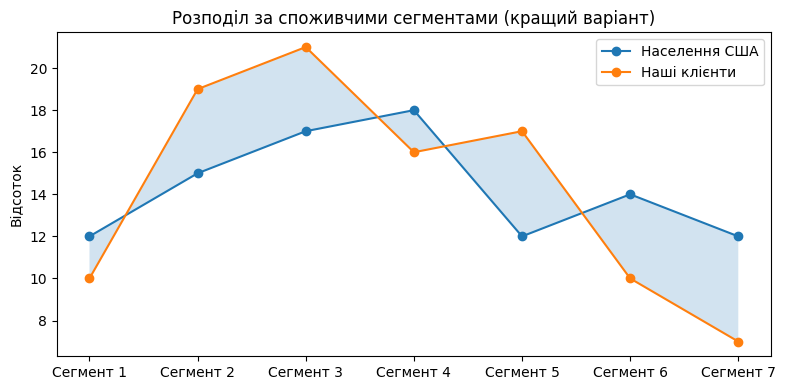

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

segments = [f"Сегмент {i}" for i in range(1, 8)]
us = np.array([12, 15, 17, 18, 12, 14, 12])
clients = np.array([10, 19, 21, 16, 17, 10, 7])

diff = clients - us

plt.figure(figsize=(8,4))
plt.plot(segments, us, marker='o', label="Населення США")
plt.plot(segments, clients, marker='o', label="Наші клієнти")
plt.fill_between(segments, us, clients, alpha=0.2)

plt.title("Розподіл за споживчими сегментами (кращий варіант)")
plt.ylabel("Відсоток")
plt.legend()
plt.tight_layout()
plt.show()

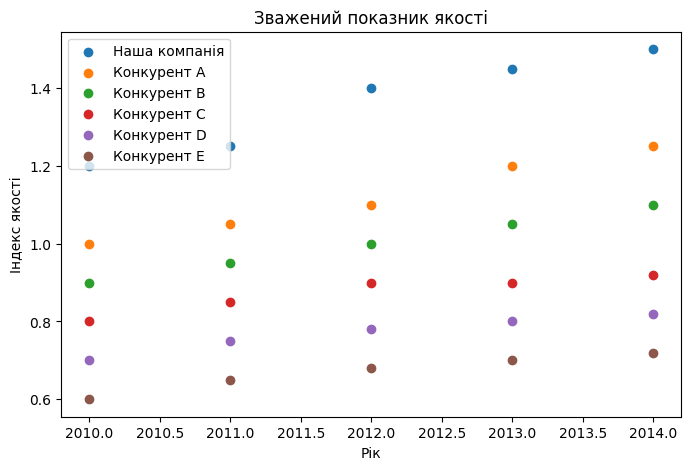

In [ ]:
# ---------------------------------------------------------
# 6. Діаграма з точками — "Зважений показник якості"
# ---------------------------------------------------------
years = [2010, 2011, 2012, 2013, 2014]

competitors = {
    "Наша компанія": [1.2, 1.25, 1.4, 1.45, 1.5],
    "Конкурент A":   [1.0, 1.05, 1.1, 1.2, 1.25],
    "Конкурент B":   [0.9, 0.95, 1.0, 1.05, 1.1],
    "Конкурент C":   [0.8, 0.85, 0.9, 0.9, 0.92],
    "Конкурент D":   [0.7, 0.75, 0.78, 0.8, 0.82],
    "Конкурент E":   [0.6, 0.65, 0.68, 0.7, 0.72],
}

fig6, ax6 = plt.subplots(figsize=(8,5))

for name, values in competitors.items():
    ax6.scatter(years, values, label=name)

ax6.set_title("Зважений показник якості")
ax6.set_xlabel("Рік")
ax6.set_ylabel("Індекс якості")
ax6.legend()
plt.show()


### 🔴 Чому графік неефективний

* 6 конкурентів × 5 років → хаос.
* Кольори подібні.
* Точки без ліній → важко побачити тренд.
* Немає структури.

### 🟢 Кращий варіант

**Лінійний графік у фасетах (один конкурент = один маленький графік)**

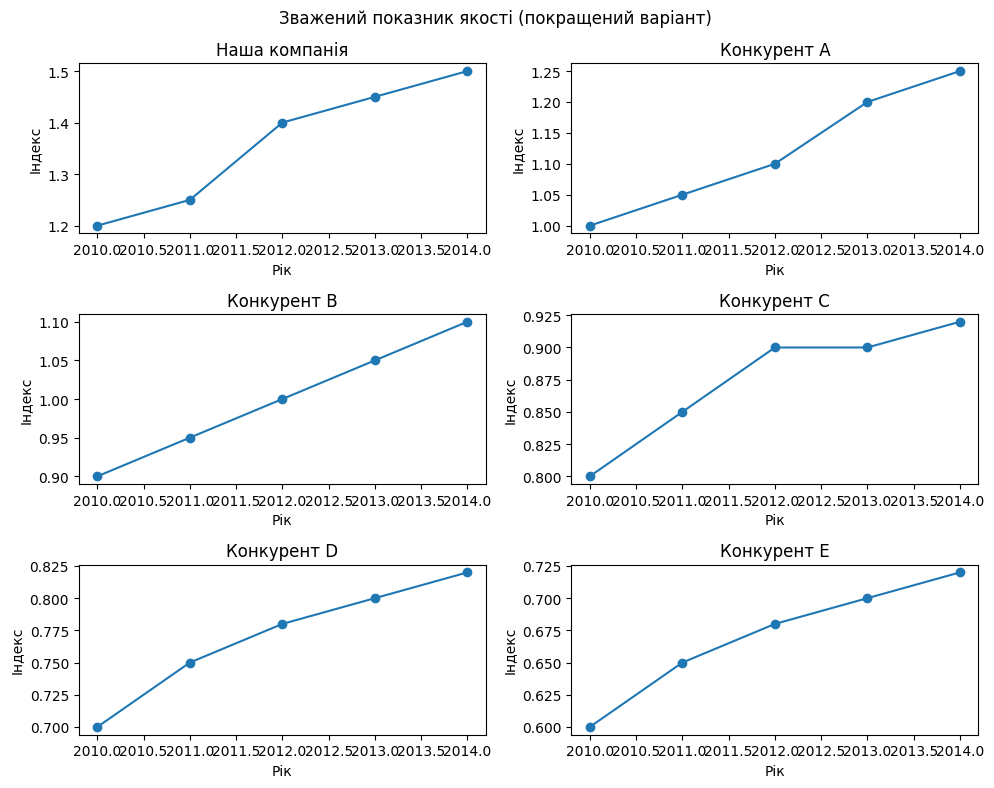

In [ ]:
import matplotlib.pyplot as plt

years = [2010, 2011, 2012, 2013, 2014]
competitors = {
    "Наша компанія": [1.2, 1.25, 1.4, 1.45, 1.5],
    "Конкурент A":   [1.0, 1.05, 1.1, 1.2, 1.25],
    "Конкурент B":   [0.9, 0.95, 1.0, 1.05, 1.1],
    "Конкурент C":   [0.8, 0.85, 0.9, 0.9, 0.92],
    "Конкурент D":   [0.7, 0.75, 0.78, 0.8, 0.82],
    "Конкурент E":   [0.6, 0.65, 0.68, 0.7, 0.72],
}

fig, axes = plt.subplots(3, 2, figsize=(10,8))

for ax, (name, values) in zip(axes.flat, competitors.items()):
    ax.plot(years, values, marker="o")
    ax.set_title(name)
    ax.set_xlabel("Рік")
    ax.set_ylabel("Індекс")

fig.suptitle("Зважений показник якості (покращений варіант)")
plt.tight_layout()
plt.show()


## Бібліотеки

**Seaborn**

* Побудований на основі matplotlib.
* Простий синтаксис для статистичних графіків.
* Добре підходить для дослідницького аналізу (EDA).

**Plotly**

* Інтерактивні графіки.
* Підходить для презентацій, дашбордів.
* Можна наводити, збільшувати, клікати.

In [3]:
!pip install seaborn

In [4]:
!pip install plotly

## Гістограма

In [5]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import plotly.express as px

<Axes: >

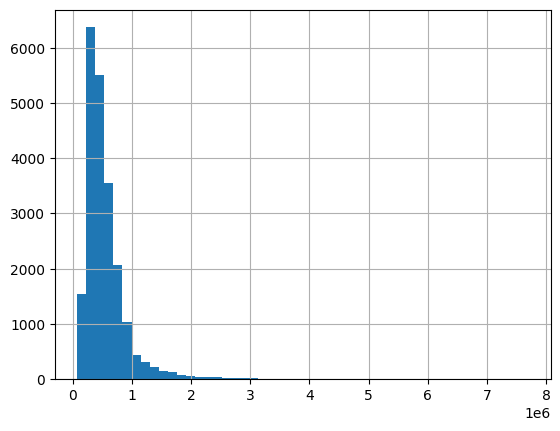

In [6]:
df.price.hist(bins=50)

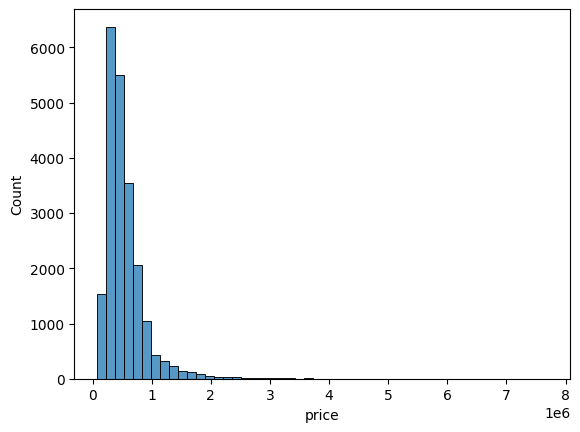

In [8]:
sns.histplot(df['price'], bins=50, kde=False)
plt.show()

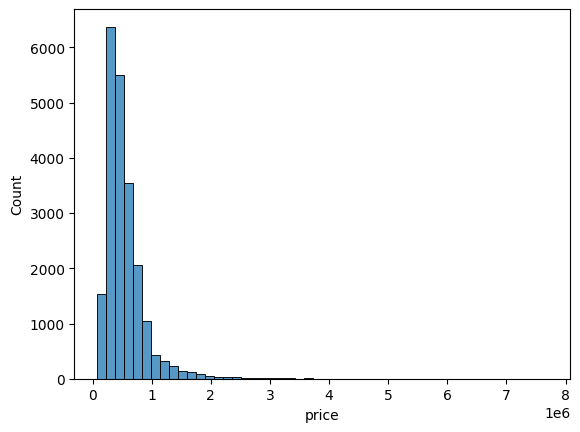

In [10]:
sns.histplot(df['price'], bins=50, kde=True)
plt.show()

In [13]:
fig = px.histogram(df, x='price', nbins=50)
fig.show()

<Axes: xlabel='price', ylabel='Count'>

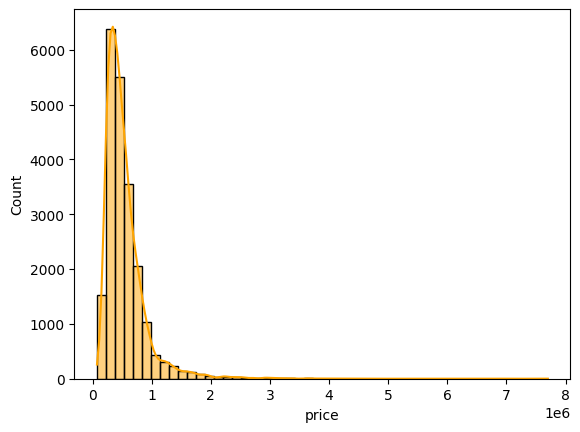

In [16]:
sns.histplot(
    df['price'],
    bins=50,
    kde=True,
    color='orange',
    edgecolor='black',
    linewidth=1
    )
plt.xlabel('Last Price')
plt.ylabel('Frequency')
plt.title('Distribution of Last Price')
plt.grid(True)
plt.show()

## Boxplot (ящик з вусами)

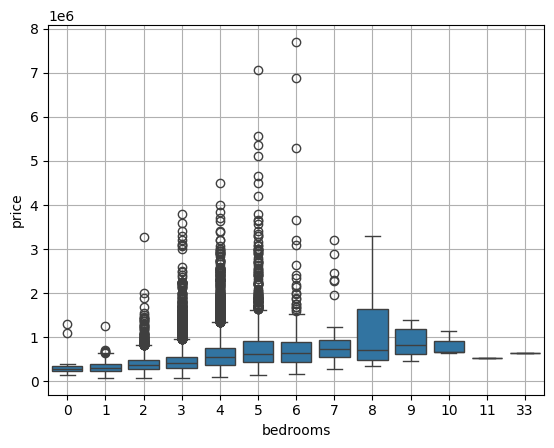

In [17]:
sns.boxplot(data=df, x='bedrooms', y='price')
plt.grid(True)
plt.show()

In [18]:
px.box(df, x='bedrooms', y='price')

In [ ]:
fig = px.box(df, x="price")
fig.show()

## Scatterplot (діграма розсіювання)

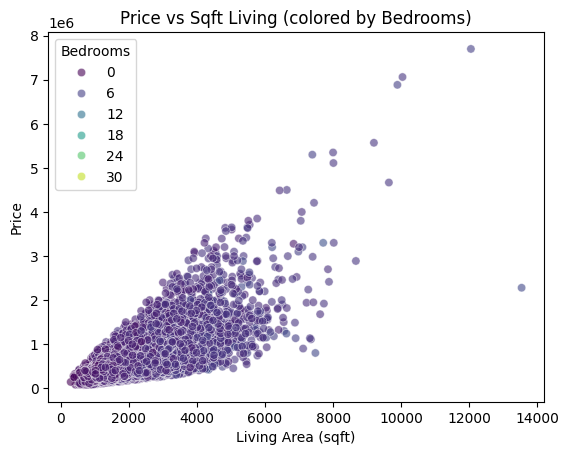

In [ ]:
sns.scatterplot(
    data=df,
    x="sqft_living",
    y="price",
    hue="bedrooms",
    palette="viridis",
    alpha=0.6
)

plt.title("Price vs Sqft Living (colored by Bedrooms)")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.legend(title="Bedrooms")
plt.show()

In [20]:
df_filtered = df[df['bedrooms'] <= 5]

In [21]:
fig = px.scatter(
    df_filtered,
    x="sqft_living",
    y="price",
    color="bedrooms",
    size="bedrooms",
    opacity=0.6,
    title="2D Scatter with 3 variables"
)

fig.show()


## Barplot (стовпчикова діаграма + агрегація)

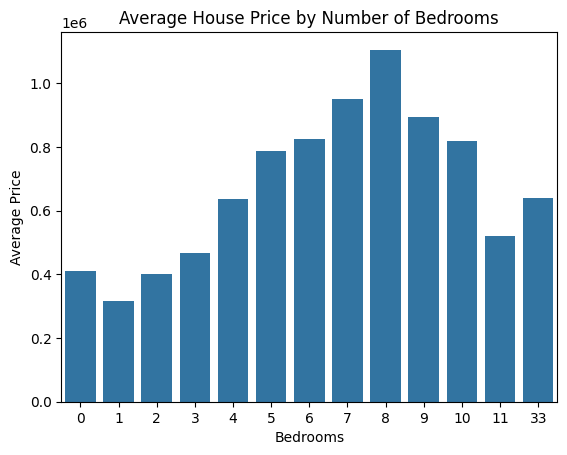

In [ ]:
sns.barplot(
    data=df,
    x="bedrooms",
    y="price",
    estimator="mean",
    errorbar=None
)

plt.title("Average House Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.show()

<Axes: >

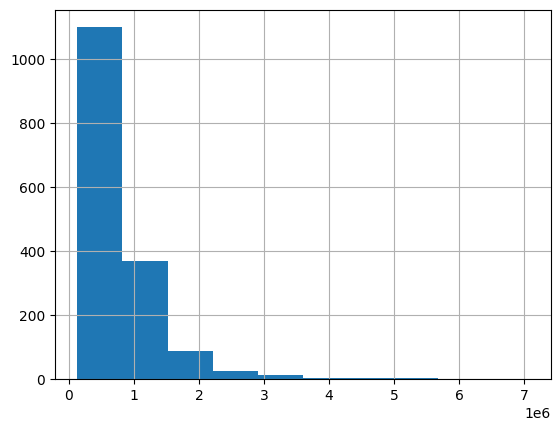

In [22]:
df_5_rooms = df[df['bedrooms'] == 5]
df_5_rooms.price.hist()

In [24]:
df_grouped = df.groupby("bedrooms", as_index=False)["price"].median()
df_grouped

,bedrooms,price
0,0,288000.0
1,1,299000.0
2,2,374000.0
3,3,413000.0
4,4,549997.5
5,5,620000.0
6,6,650000.0
7,7,728580.0
8,8,700000.0
9,9,817000.0


In [25]:
fig = px.bar(
    df_grouped,
    x="bedrooms",
    y="price",
    title="Average House Price by Number of Bedrooms",
    labels={"price": "Average Price", "bedrooms": "Bedrooms"}
)

fig.show()

## lineplot (лінійний графік)

In [26]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")

In [27]:
df['month'] = df["date"].dt.to_period('M').dt.to_timestamp()

In [28]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-01
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-01
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-01
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-01
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-01
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-01
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-01
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-01


In [29]:
res = df.groupby('month')['price'].mean().reset_index()

In [ ]:
res

,month,last_price
0,2021-01-01,1.079397e+07
1,2021-02-01,5.962500e+06
2,2021-03-01,5.812500e+06
3,2021-04-01,5.086125e+06
4,2021-05-01,3.963750e+06
5,2021-06-01,8.039714e+06
6,2021-07-01,6.687563e+06
7,2021-08-01,5.806276e+06
8,2021-09-01,5.432349e+06
9,2021-10-01,4.890690e+06


In [ ]:
res.columns.to_list()

['month', 'price']

In [30]:
px.line(res, x='month', y='price')

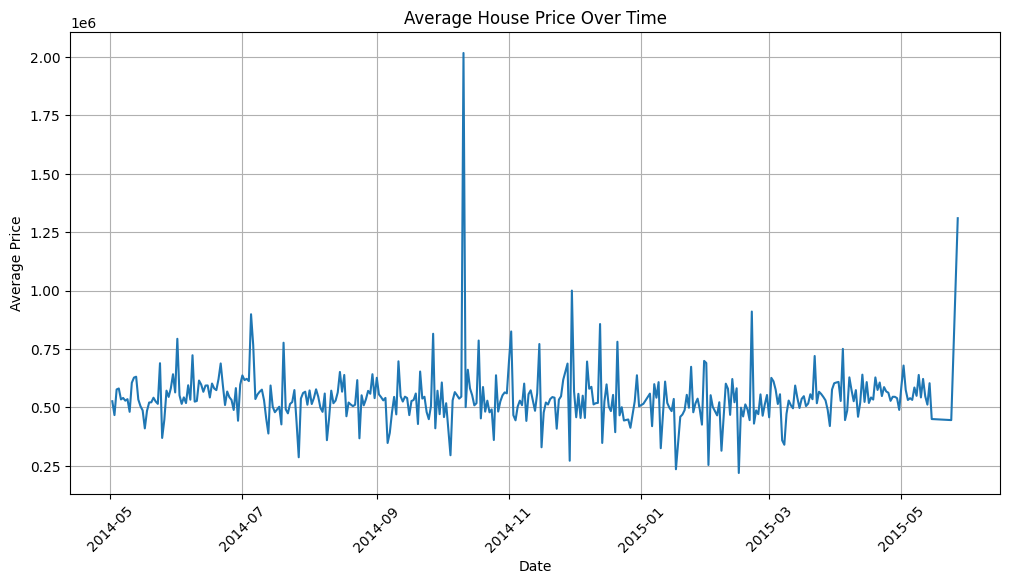

In [31]:
df_grouped = df.groupby("date", as_index=False)["price"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_grouped,
    x="date",
    y="price"
)

plt.title("Average House Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()